In [69]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
%matplotlib inline

import matplotlib.pyplot as plt

In [70]:
LOCATION = 'comtradee.csv'

In [71]:
transport = read_csv(LOCATION, dtype={'Commodity Code':str})
transport.tail(2)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
202,H4,2020,2020,2020,0,0,1,Import,818,Egypt,...,0,NaN,NaN,NaN,NaN,NaN,6.027955e+10,NaN,NaN,4
203,H4,2020,2020,2020,0,0,2,Export,818,Egypt,...,0,NaN,NaN,NaN,NaN,NaN,2.681514e+10,NaN,NaN,4


In [72]:
def transportType(code):
    if code == 'TOTAL': # total of all HS commodities
        return 'All Commodities'
    if code == 'Not Total': # concentrated or sweetened
        return 'Not All commodities' 
    return 'All CPCs'

COMMODITY = 'All Commodities'
transport[COMMODITY] = transport['Commodity Code'].apply(transportType)
MONTH = 'Period'
REPORTER = 'Reporter'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
headings = [MONTH, REPORTER, FLOW, COMMODITY, VALUE]
transport = transport[headings]
transport.head()

,Period,Reporter,Trade Flow,All Commodities,Trade Value (US$)
0,2020,Albania,Import,All Commodities,5.602160e+09
1,2020,Albania,Export,All Commodities,2.514736e+09
2,2020,Azerbaijan,Import,All Commodities,1.072979e+10
3,2020,Azerbaijan,Export,All Commodities,1.374057e+10
4,2020,Argentina,Import,All Commodities,4.235551e+10


In [73]:
transport = transport[transport[REPORTER] != 'World']
transport.head()

,Period,Reporter,Trade Flow,All Commodities,Trade Value (US$)
0,2020,Albania,Import,All Commodities,5.602160e+09
1,2020,Albania,Export,All Commodities,2.514736e+09
2,2020,Azerbaijan,Import,All Commodities,1.072979e+10
3,2020,Azerbaijan,Export,All Commodities,1.374057e+10
4,2020,Argentina,Import,All Commodities,4.235551e+10


In [77]:
grouped = transport.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
Export       1.414710e+13
Import       1.456575e+13
Re-Export    2.933018e+11
Re-Import    6.094678e+09
Name: Trade Value (US$), dtype: float64

In [81]:
imports = transport[transport[FLOW] == 'Import']
grouped = imports.groupby([REPORTER])
print('The UK imports from', len(grouped), 'countries.')
print('The 5 biggest exporters to the UK are:')
totalImports = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalImports.head()

The UK imports from 81 countries.
The 5 biggest exporters to the UK are:


Reporter
USA               2.405380e+12
China             2.055590e+12
Germany           1.171420e+12
Japan             6.354020e+11
United Kingdom    6.312210e+11
Name: Trade Value (US$), dtype: float64

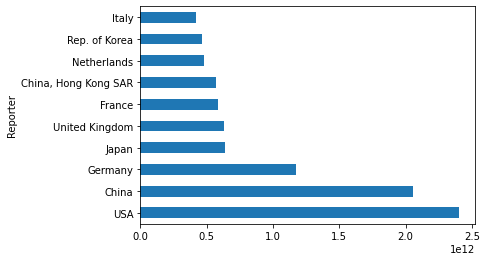

In [82]:
totalImports.head(10).plot(kind='barh')

In [86]:
exports = transport[transport[FLOW] == 'Export']
grouped = exports.groupby([REPORTER])
print('The UK exports to', len(grouped), 'countries.')
print('The 5 biggest importers from the UK are:')
grouped[VALUE].aggregate(sum).sort_values(ascending=False,inplace=False).head()

The UK exports to 81 countries.
The 5 biggest importers from the UK are:


Reporter
China          2.590600e+12
USA            1.430250e+12
Germany        1.382850e+12
Japan          6.412830e+11
Netherlands    5.515980e+11
Name: Trade Value (US$), dtype: float64

In [94]:
def buysEveryMonth(group):
    return len(group) == 10

grouped = exports.groupby([REPORTER])
regular = grouped.filter(buysEveryMonth)
regular[(regular[MONTH] == 2020) & (regular[COMMODITY] != 'All Commodities')]

,Period,Reporter,Trade Flow,All Commodities,Trade Value (US$)


In [88]:
regular[VALUE].sum() / exports[VALUE].sum()

0.0

In [ ]:
Q4 Which countries does the UK both import from and export to?

In [92]:
countries = pivot_table(transport, index=[REPORTER], columns=[FLOW], 
                        values=VALUE, aggfunc=sum)
countries.head()

Trade Flow,Export,Import,Re-Export,Re-Import
Reporter,,,,
Albania,2.514736e+09,5.602160e+09,NaN,NaN
Argentina,5.488382e+10,4.235551e+10,NaN,NaN
Armenia,2.519990e+09,4.541430e+09,164243137.0,2042209.0
Aruba,6.593090e+07,9.392862e+08,NaN,NaN
Australia,2.450460e+11,2.119730e+11,NaN,NaN


In [93]:
countries.dropna()

Trade Flow,Export,Import,Re-Export,Re-Import
Reporter,,,,
Armenia,2.519990e+09,4.541430e+09,1.642431e+08,2.042209e+06
Canada,3.895130e+11,4.053910e+11,3.322761e+10,9.294206e+07
Georgia,3.342142e+09,8.031494e+09,9.343388e+08,4.995399e+06
Italy,4.959770e+11,4.226480e+11,1.467987e+10,3.840199e+09
Luxembourg,1.344229e+10,2.060962e+10,4.577969e+07,4.758020e+07
Myanmar,1.692925e+10,1.796420e+10,2.293715e+08,4.950500e+05
Namibia,5.600211e+09,6.823461e+09,2.610489e+09,9.264457e+06
Pakistan,2.223716e+10,4.577514e+10,2.899268e+08,3.375693e+07
Rep. of Moldova,2.485160e+09,5.415674e+09,5.798537e+08,8.169839e+06
